In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [180]:
with open("CL_test__Kp_13dot2__Ki_44dot0__ref_0dot2.txt", "r") as file:
    raw_data = file.read().strip().split("Mode")[1:-2]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")[1:]))
columns = ["Mode", *columns]

data_mode = ndata*[""]
data_np = np.zeros((len(columns)-1, ndata))

for i in range(ndata):
    spi_in_str = False
    current = raw_data[i]
    if ("SPI" in raw_data[i]):
        spi_in_str = True
        current = re.sub("SPI.*", "", raw_data[i], flags=re.S)
    if ("query" in raw_data[i]):
        current = re.sub("query.*\n", "", current)   
    if ("\na = " in raw_data[i]):
        current = re.sub("\na = .*", "\n", current, flags=re.S)
    if ("\nstate is" in raw_data[i]):
        current = re.sub("\nstate is.*", "\n", current, flags=re.S) 
    try:  
        splitted_data = current.strip().split("\n")
        mode = splitted_data[0].strip()
        data_mode[i] = mode
        data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), splitted_data[1:]))

    except:
        print("Error parsing sample number ", i, "\n")
        print(raw_data[i])
        print(current)
        break

data = pd.DataFrame(data_np.T, columns=columns[1:])
data.insert(0,"time",np.cumsum(data["dt"]),False)
data.insert(0,"Mode",data_mode,False)

data

,Mode,time,dt,xpos,ypos,thetapos,vfwd,omega,speed_left,speed_right
0,idle,0.001,0.001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,idle,0.002,0.001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,idle,0.003,0.001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,idle,0.004,0.001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,idle,0.005,0.001,0.092912,-0.010231,-0.176860,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13103,SpeedControl,13.104,0.001,0.731093,-0.118428,-0.170087,0.0,0.0,0.0,0.0
13104,SpeedControl,13.105,0.001,0.731093,-0.118428,-0.170087,0.0,0.0,0.0,0.0
13105,SpeedControl,13.106,0.001,0.731093,-0.118428,-0.170087,0.0,0.0,0.0,0.0
13106,SpeedControl,13.107,0.001,0.731093,-0.118428,-0.170087,0.0,0.0,0.0,0.0


In [181]:
mask = data["Mode"] != "idle"
# mask = np.logical_and(mask, data["time"] <=100)
t0 = data["time"][mask].iloc[0]
x0 = data["xpos"][mask].iloc[0]
y0 = data["ypos"][mask].iloc[0]

data = data[mask]
data.loc[:,"time"] = data["time"].iloc[:] - t0
data.loc[:,"xpos"] = data["xpos"] - x0
data.loc[:,"ypos"] = data["ypos"] - y0
mask = np.logical_and(mask, data["time"] <= 1)
data = data[mask]
data

C:\Users\ethan\AppData\Local\Temp\ipykernel_8000\1404760835.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[mask]


,Mode,time,dt,xpos,ypos,thetapos,vfwd,omega,speed_left,speed_right
8108,SpeedControl,0.000,0.001,0.000000,0.000000e+00,-0.176860,0.000000,0.000000,0.000000,0.000000
8109,SpeedControl,0.001,0.001,0.000000,0.000000e+00,-0.176860,0.000000,0.000000,0.000000,0.000000
8110,SpeedControl,0.002,0.001,0.000005,-9.000000e-07,-0.176835,0.005164,0.025399,0.002951,0.007377
8111,SpeedControl,0.003,0.001,0.000020,-3.600000e-06,-0.176776,0.015492,0.059264,0.010328,0.020655
8112,SpeedControl,0.004,0.001,0.000069,-1.230000e-05,-0.176750,0.049425,0.025399,0.047212,0.051639
...,...,...,...,...,...,...,...,...,...,...
9104,SpeedControl,0.996,0.001,0.189136,-3.312990e-02,-0.170291,0.202128,0.016932,0.200653,0.203604
9105,SpeedControl,0.997,0.001,0.189327,-3.316270e-02,-0.170197,0.194014,0.093129,0.185899,0.202128
9106,SpeedControl,0.998,0.001,0.189516,-3.319510e-02,-0.170070,0.191063,0.126994,0.179997,0.202128
9107,SpeedControl,0.999,0.001,0.189705,-3.322770e-02,-0.169994,0.192538,0.076196,0.185899,0.199177


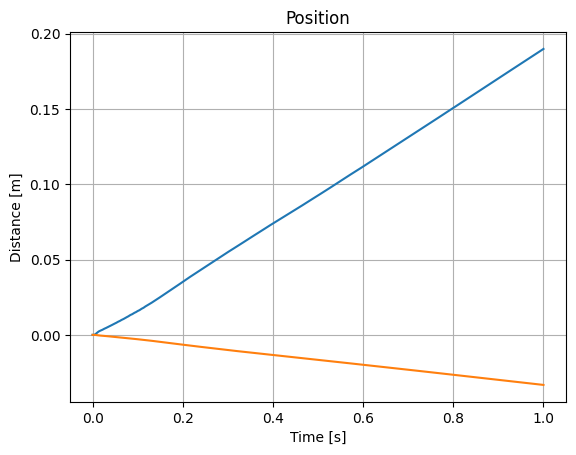

In [182]:
plt.title("Position")
plt.plot(data["time"], data["xpos"], label="x")
plt.plot(data["time"], data["ypos"], label="y")
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.grid()
plt.show()

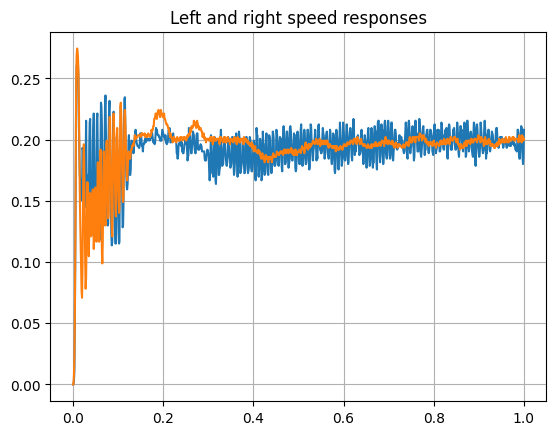

In [183]:
plt.title("Left and right speed responses")
plt.plot(data['time'], data["speed_left"], label="left speed")
plt.plot(data['time'], data["speed_right"], label="right speed")
plt.grid()
plt.show()

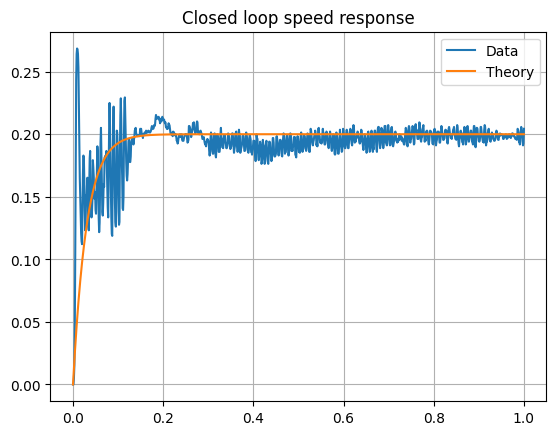

In [185]:
tau = 0.3/10
A = 0.2
speed_resp_th = A*(1-np.exp(-data["time"]/tau))
plt.title("Closed loop speed response")
plt.plot(data['time'], data["vfwd"], label="Data")
plt.plot(data["time"], speed_resp_th, label="Theory")
plt.legend()
plt.grid()
# plt.xlim(0.6,0.8)
plt.show()

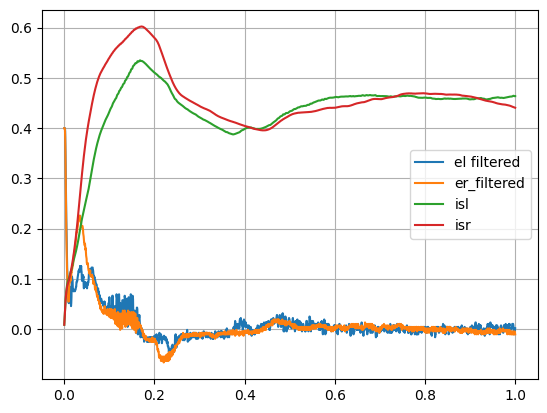

In [94]:
# plt.plot(data["time"], data["el_filtered"], label="el filtered")
# plt.plot(data["time"], data["er_filtered"], label="er_filtered")
# plt.plot(data["time"], data["isl"], label="isl")
# plt.plot(data["time"], data["isr"], label="isr")

# plt.grid()
# plt.legend()
# plt.show()